# Exploring the Relationship Between Life Expectancy, GDP per Capita, and Current Health Expenditure per Capita in 2020

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from scipy.stats import pearsonr
import statsmodels.api as sm
import plotly.express as px
from scipy.stats import pearsonr
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [57]:
df=pd.read_csv('Project.csv')

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
df.head()

,country,life_expectancy,healthcare_expenditure,gdp,che_per_capita
0,Afghanistan,62.6,0.1553,516.87,80.27
1,Albania,77.0,0.0680,5278.22,358.92
2,Algeria,74.5,0.0632,3354.15,211.98
3,Andorra,79.0,0.0905,37207.18,3367.25
4,Angola,62.3,0.0291,1639.95,47.72


In [60]:
df.dtypes

country                    object
life_expectancy           float64
healthcare_expenditure    float64
gdp                       float64
che_per_capita            float64
dtype: object

# Distributions and Boxplots of GDP , Life Expectancy , and Healthcare Expenditure

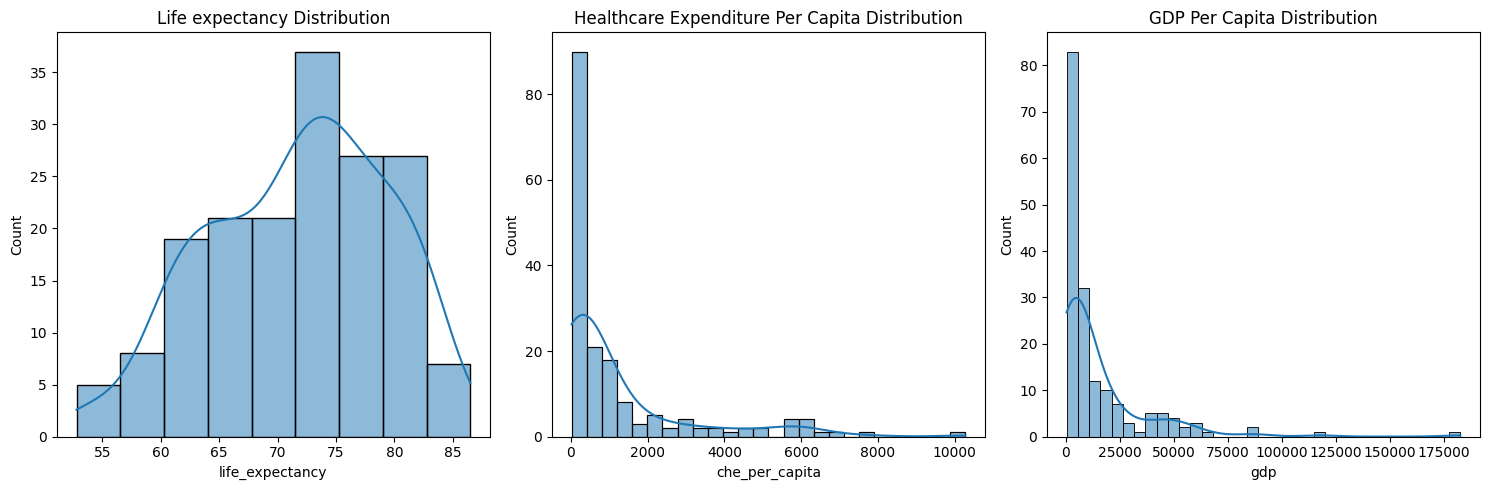

In [61]:
#
columns=['life_expectancy','che_per_capita','gdp']
titles=['Life expectancy Distribution','Healthcare Expenditure Per Capita Distribution','GDP Per Capita Distribution']
fig,axes=plt.subplots(1, 3, figsize=(15, 5))

for col,title,ax in zip(columns,titles,axes):
    sns.histplot(df[col],kde=True,ax=ax)
    ax.set_title(title)
    
    
plt.tight_layout()
plt.show()

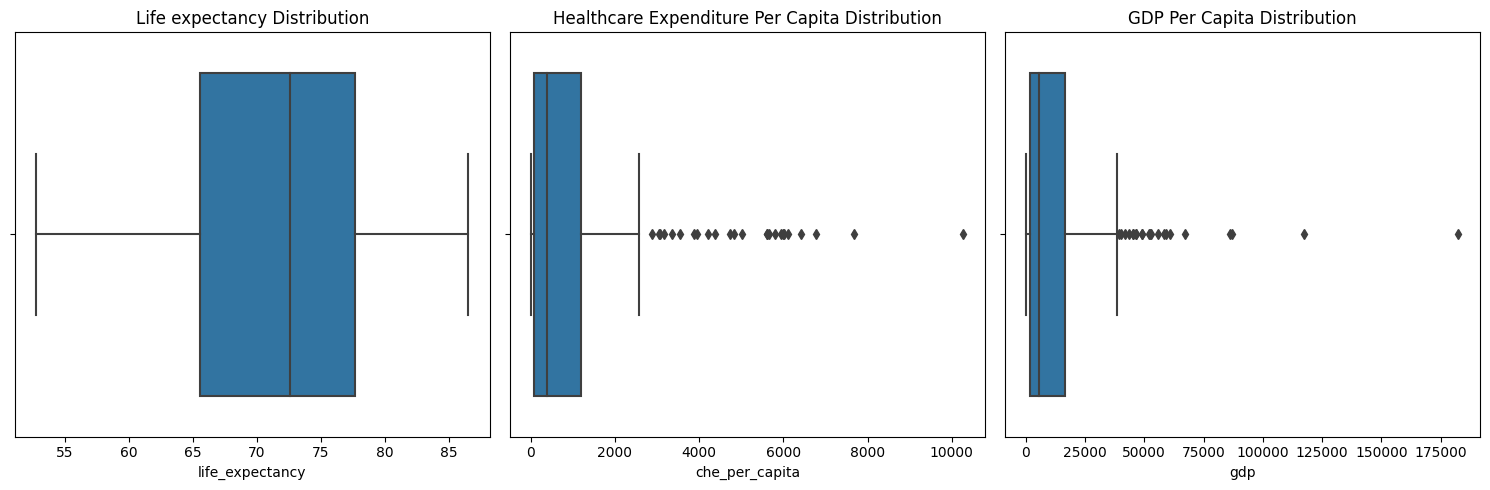

In [62]:
fig,axes=plt.subplots(1, 3, figsize=(15, 5))
for col,title,ax in zip(columns,titles,axes):
    sns.boxplot(x=df[col],ax=ax)
    ax.set_title(title)
    
plt.tight_layout()
plt.show()

# Correlation between the variables

In [63]:
corr_matrix=df.corr()
corr_matrix

<ipython-input-63-381c0cdd9e51>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,life_expectancy,healthcare_expenditure,gdp,che_per_capita
life_expectancy,1.000000,0.319345,0.638509,0.663989
healthcare_expenditure,0.319345,1.000000,0.203576,0.473719
gdp,0.638509,0.203576,1.000000,0.823119
che_per_capita,0.663989,0.473719,0.823119,1.000000


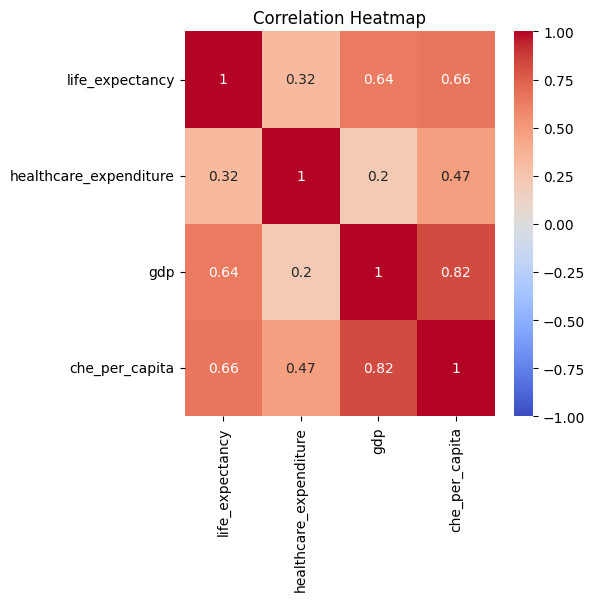

In [64]:
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Bar Chart of incomes as bins


In [65]:
## Creating bins for GPD Per Capita 
bin_ranges = [0, 1045, 4095, 12695, float('inf')]
bin_labels = ['Low-income', 'Lower-middle-income', 'Upper-middle-income', 'High-income']
df['Income_Group'] = pd.cut(df['gdp'], bins=bin_ranges, labels=bin_labels)
df

,country,life_expectancy,healthcare_expenditure,gdp,che_per_capita,Income_Group
0,Afghanistan,62.6,0.1553,516.87,80.27,Low-income
1,Albania,77.0,0.0680,5278.22,358.92,Upper-middle-income
2,Algeria,74.5,0.0632,3354.15,211.98,Lower-middle-income
3,Andorra,79.0,0.0905,37207.18,3367.25,High-income
4,Angola,62.3,0.0291,1639.95,47.72,Lower-middle-income
...,...,...,...,...,...,...
167,Uzbekistan,70.3,0.0675,1786.47,120.59,Lower-middle-income
168,Vanuatu,70.3,0.0397,2917.76,115.83,Lower-middle-income
169,Yemen,64.7,0.0780,291.68,22.75,Low-income
170,Zambia,62.4,0.0562,956.83,53.77,Low-income


<Axes: >

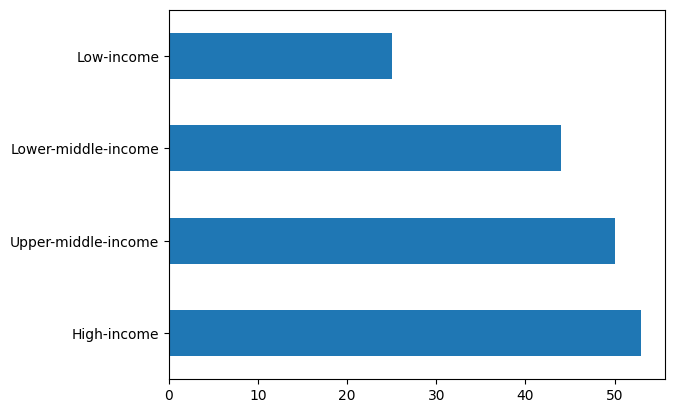

In [66]:
#Bar Chart of incomes as frequencies
df['Income_Group'].value_counts().plot(kind='barh')

## How does life expectancy vary across countries with different income levels?

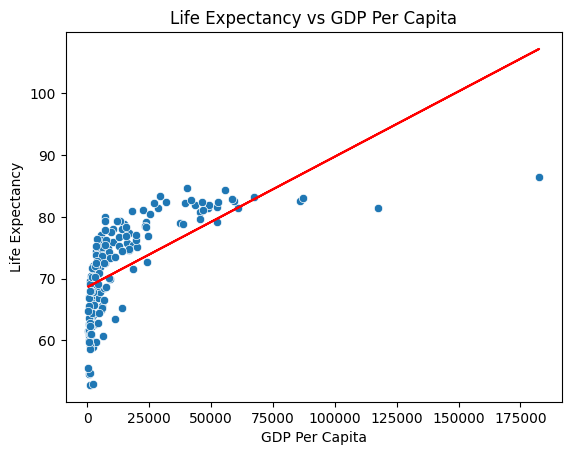

In [67]:
# How does life expectancy vary across countries with different income levels?
sns.scatterplot(data=df, x='gdp', y='life_expectancy')
plt.title('Life Expectancy vs GDP Per Capita')
plt.xlabel('GDP Per Capita')
plt.ylabel('Life Expectancy')

# Calculate regression 
reg = sm.OLS(df['life_expectancy'], sm.add_constant(df['gdp'])).fit()

# Plot regression line
plt.plot(df['gdp'], reg.params[0] + reg.params[1]*df['gdp'], 'r-')



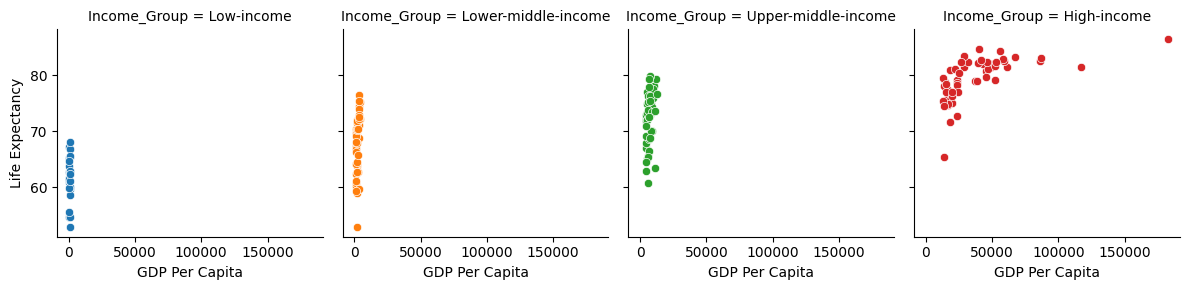

In [68]:
#FacetGrid of the Income 
g = sns.FacetGrid(df, col='Income_Group',hue='Income_Group')
g.map(sns.scatterplot, 'gdp', 'life_expectancy')
g.set_axis_labels('GDP Per Capita', 'Life Expectancy')



In [69]:
# Group by Income_Group
low_income = df[df['Income_Group'] == 'Low-income']
lower_middle_income = df[df['Income_Group'] == 'Lower-middle-income']  
upper_middle_income = df[df['Income_Group'] == 'Upper-middle-income']
high_income = df[df['Income_Group'] == 'High-income']  

life_exp = df.groupby('Income_Group')['life_expectancy'].mean()
fig = px.bar(life_exp, 
             x=life_exp.index, 
             y='life_expectancy',
             text='life_expectancy',
             title='Life expectancy by income level')

# Show plot
fig.show()


How limited resources and healthcare access in low-income countries may influence life expectancy?
- In low-income countries, life expectancy suffers due to limited resources, inadequate healthcare, and prevalent violence. By concentrating on targeted investments in four key areas—healthcare, nutrition, water/sanitation, and peace—we can bring about transformative change. These strategic efforts can improve the living conditions and prospects for millions, resulting in longer, healthier lives, and fostering a more just and prosperous world for everyone.




## What is the relationship between GDP per capita and current health expenditure per capita ?


###### Before removing the outliers

In [70]:
r, p = pearsonr(df['che_per_capita'], df['gdp'])
fig = px.scatter(df, x='che_per_capita', y='gdp', title=f'Pearson r = {r:.2f} (p = {p:.2f})')
fig.add_annotation(x=df['che_per_capita'].min(), y=df['gdp'].max(),  
                   text=f'Pearson r = {r:.2f} (p = {p:.2f})',  
                   showarrow=False)

In [71]:
# Identifying the outliers based on GDP
px.box(df,x='Income_Group',y='gdp')

###### After removing outliers

In [72]:
df_outlier = df.drop(df[df['country'].isin(['Monaco', 'Luxembourg'])].index)   
r, p = pearsonr(df_outlier['che_per_capita'], df_outlier['gdp'])
fig = px.scatter(df_outlier, x='che_per_capita', y='gdp', title=f'Pearson r = {r:.2f} (p = {p:.2f})')
fig.add_annotation(x=df_outlier['che_per_capita'].min(), y=df_outlier['gdp'].max(),  
                   text=f'Pearson r = {r:.2f} (p = {p:.2f})',  
                   showarrow=False)

There is a positive relationship between GDP per capita and current health expenditure per capita. This means that wealthier nations tend to spend more on healthcare than poorer nations. This is likely due to a number of factors, including:
-Wealthier nations have more resources to invest in healthcare, such as money, personnel, and technology.
-Wealthier nations have higher rates of chronic diseases, such as heart disease, cancer, and diabetes, which require more expensive treatment.
-Wealthier nations have higher expectations for healthcare, and are willing to pay more for it.

## How does the distribution of current health expenditure per capita differ between countries with low, medium, and high life expectancy?

In [73]:
#Using boxplots to observe where are the outliers segmented in which groups
labels=['Low','Medium','High']
life_expectancy_bins=[0,65.55,77.64,100]
df['Life Expectancy Group']=pd.cut(df.life_expectancy,bins=life_expectancy_bins,labels=labels)
fig=px.box(df,x='Life Expectancy Group',y='che_per_capita',title='Life expectancy by Current Health Expenditure per Capita')
fig.show()

To translate greater healthcare expenditure into meaningful life expectancy gains, countries must take an integrated long-term approach across all aspects of public health. Simply increasing budgets will not achieve outcomes; money must be well-spent and targeted as part of a multi-pronged strategy to make a difference. This includes ensuring equitable access to care for all through universal healthcare, reduced costs for the disadvantaged, and fair resource distribution so new funds actually reach those in need. Healthcare systems must also incentive efficiency and accountability, reducing waste and unnecessary administration, limiting corruption, and rewarding good outcomes and preventive care. Performance metrics and oversight maximize the impact of new resources. Public-private hybrid systems often strike the right balance. Further, healthcare funding must be part of a broader public health strategy including investments in education, sanitation, poverty reduction, health education, and environment, which are equally essential to well-being. While more money for treatments matters, health starts before illness, and prevention has higher returns. Countries need an integrated long-term approach recognizing people live beyond clinics alone. Strong public health practices, social programs, and gradual funding increases over time as economies grow create lasting success, while quick fixes lead to disappointment. Overall prosperity and robust public health strategies drive outcomes, not budgets and technologies alone. Well-spent money, not just more of it, is key. Increased healthcare expenditure can substantially improve life expectancy only if paired with wider reforms enabling new resources to be strategically invested over generations. Access for all, efficiency, accountability, education, poverty reduction, and environment investments alongside medical funding over time are required to realize the benefits of greater investment in a sustainable way.

## What is the relationship between life expectancy and economic status within different world regions?


In [74]:
df_regions=pd.read_csv('Reigons.csv')

In [79]:
merged_df = df.merge(df_regions[['Country', 'Region', 'Subregion']], left_on='country', right_on='Country', how='left')
merged_df.drop('Country', axis=1, inplace=True)


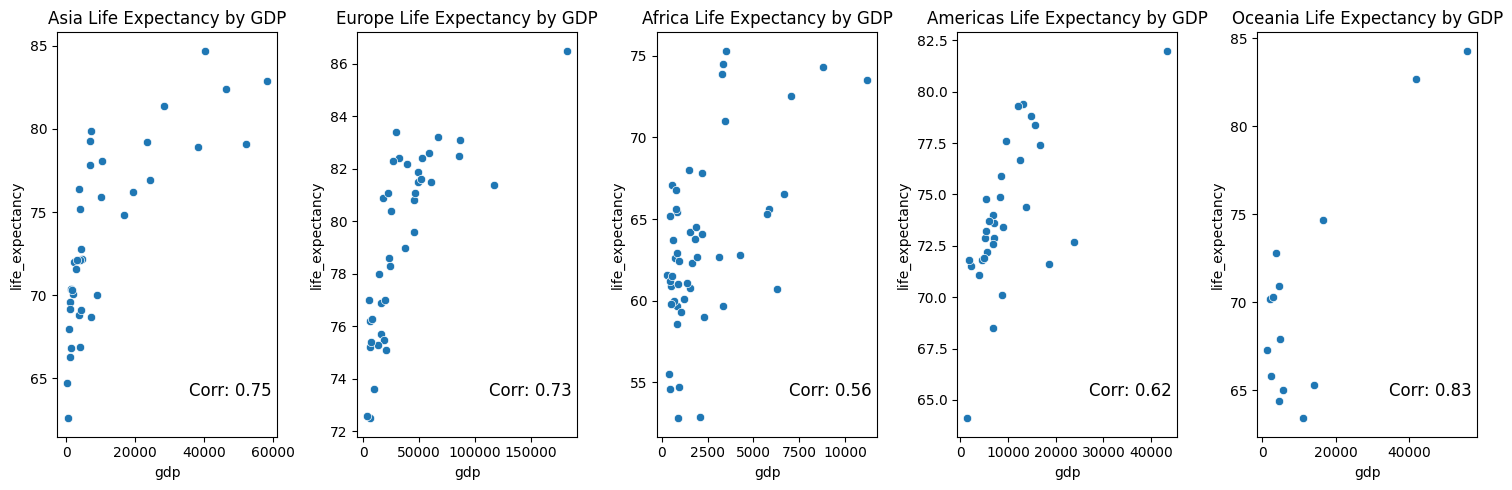

In [93]:
Regions=['Asia','Europe','Africa','Americas','Oceania']
Title=['Asia Life Expectancy by GDP','Europe Life Expectancy by GDP','Africa Life Expectancy by GDP','Americas Life Expectancy by GDP','Oceania Life Expectancy by GDP']
fig,axes=plt.subplots(1, 5, figsize=(15, 5))

for reg,title,ax in zip(Regions,Title,axes):
    region_df = merged_df[merged_df['Region'] == reg]
    sns.scatterplot(data=region_df, x='gdp', y='life_expectancy', ax=ax)
    ax.set_title(title)
    correlation = region_df['gdp'].corr(region_df['life_expectancy'])
    ax.text(0.6, 0.1, f'Corr: {correlation:.2f}', transform=ax.transAxes, fontsize=12)


plt.tight_layout()
plt.show()


The relationship between life expectancy and wealth (GDP per capita) varies across different world regions. Asia, Europe, and Oceania exhibit a moderately strong to strong positive correlation, indicating that increased wealth tends to have a noticeable impact on life expectancy. This suggests that investments in healthcare, infrastructure, and other factors contributing to overall well-being have a significant influence on the life expectancy in these regions. However, Africa and the Americas show a moderate positive correlation, implying that although there is a relationship between wealth and life expectancy, other factors might be playing a more prominent role in these regions.

Several factors can strengthen or weaken the relationship between life expectancy and wealth within regions, including poverty, inequality, infrastructure, and disease burden. High levels of poverty and income inequality can limit the impact of wealth on life expectancy, as resources might not be evenly distributed across the population or effectively utilized to improve living standards. Additionally, inadequate infrastructure, such as healthcare facilities, sanitation systems, and transportation networks, can hinder the benefits of increased wealth on life expectancy. Finally, regions with a high disease burden might experience a weaker relationship between life expectancy and wealth, as addressing these health problems may require substantial resources and time. In summary, while the correlation coefficients indicate a positive relationship between life expectancy and wealth in all regions, the strength of this relationship is influenced by various factors that affect the overall well-being of the population.

# Can we predict life expectancy based on GDP per capita and current health expenditure per capita? 

In [124]:


merged_df['log_gdp'] = np.log(merged_df['gdp'])

X, y = merged_df[['log_gdp', 'che_per_capita']], merged_df['life_expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression().fit(X_train, y_train)
r_squared = r2_score(y_test, model.predict(X_test))

xx, yy = np.meshgrid(np.linspace(merged_df['log_gdp'].min(), merged_df['log_gdp'].max(), 10),
                     np.linspace(merged_df['che_per_capita'].min(), merged_df['che_per_capita'].max(), 10))
zz = model.intercept_ + model.coef_[0] * xx + model.coef_[1] * yy

fig = go.Figure([go.Scatter3d(x=merged_df['log_gdp'], y=merged_df['che_per_capita'], z=merged_df['life_expectancy'],
                              mode='markers', marker=dict(size=4, color='blue', opacity=0.7)),
                 go.Surface(x=xx, y=yy, z=zz, colorscale='Viridis', opacity=0.5, showscale=False)])

fig.update_layout(scene=dict(xaxis_title='Log(GDP per Capita)',
                             yaxis_title='HE per Capita',
                             zaxis_title='Life Expectancy'),
                  title=f'Life Expectancy, Log(GDP), and Health Expenditure per Capita (R-squared: {r_squared:.2f})')

fig.show()

While regression analysis can identify possible causal relationships, additional analyses are required to conclusively determine causation. Correlation coefficients and regression results alone are insufficient for inferring causation with any degree of certainty.